In [4]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install numpy
%pip install cloudpickle

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np

SEED = 42

np.random.seed (SEED)

In [6]:
from sklearn.model_selection import train_test_split

# Load the dataset
dataset_orig = pd.read_parquet ("./datasets/dataset_clean.parquet")

# Split the dataset
X = dataset_orig.drop(columns=['salary'], axis=1)
y = dataset_orig['salary']
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.2, random_state=SEED)

print ("X train")
print (X_train.info ())
print ()

print ("y train")
print (y_train.info ())
print ()

print ("X test")
print (X_test.info ())
print ()

print ("y test")
print (y_test.info ())
print ()

X train
<class 'pandas.core.frame.DataFrame'>
Index: 5347 entries, 2908 to 860
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   work_location  5347 non-null   object
 1   job_role       5347 non-null   object
 2   id             5347 non-null   int64 
 3   gender         5347 non-null   object
 4   name           5347 non-null   object
 5   pfp            5347 non-null   object
 6   reports_to     5347 non-null   int64 
 7   phone_number   5347 non-null   object
dtypes: int64(2), object(6)
memory usage: 376.0+ KB
None

y train
<class 'pandas.core.series.Series'>
Index: 5347 entries, 2908 to 860
Series name: salary
Non-Null Count  Dtype  
--------------  -----  
5347 non-null   float64
dtypes: float64(1)
memory usage: 83.5 KB
None

X test
<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 3089 to 6652
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         -----------

In [7]:
from sklearn.preprocessing import FunctionTransformer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

RARE_THRESHOLD = 8

# job_role_counts = dataset_orig['job_role'].value_counts()
# rare_job_roles = job_role_counts[job_role_counts <= RARE_THRESHOLD]
average_salaries_per_job = dataset_orig.groupby("job_role")["salary"].mean()

# Consolidates rare job roles into new categories based on their average salary
def addMeanSalaries (X):
    X_new = pd.DataFrame ()
    X_new["mean_salary_for_job"] = X['job_role'].map(average_salaries_per_job)
    X_new["mean_salary_for_job"] = X_new["mean_salary_for_job"].fillna(X_new["mean_salary_for_job"].mean ())

    return np.array (X_new.values).reshape(-1, 1)

def getInputFeaturesForJob (self, input_features):
    return ["mean_salary_for_job"]

addMeanSalariesTransformer = FunctionTransformer(
    addMeanSalaries,
    feature_names_out=getInputFeaturesForJob
)

process_job_roles = Pipeline([
    ('generate_mean_salaries', addMeanSalariesTransformer),
    ("log_values", FunctionTransformer(np.log, inverse_func=np.exp, feature_names_out="one-to-one")),
    ('scale_mean_salaries', RobustScaler ())
])

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create data preprocessing pipeline
preprocessing = ColumnTransformer([
    ("onehot_work_location", OneHotEncoder(handle_unknown="error"), ["work_location"]),
    ("process_job_roles", process_job_roles, ["job_role"]),
    # ("onehot_job_role", OneHotEncoder(handle_unknown="infrequent_if_exist", min_frequency=RARE_THRESHOLD), ["job_role"]),
    ('job_text', TfidfVectorizer(
        max_features=100,
        min_df=2,
        ngram_range=(1, 1)
    ), 'job_role')
    # ("drop_job_role", "drop", ["job_role"])
], remainder="drop")

data_trans = preprocessing.fit_transform (dataset_orig)
columns_trans = preprocessing.get_feature_names_out()
dataset_trans = pd.DataFrame(data_trans.toarray(), columns=columns_trans)
print ("Number of columns: ", len(dataset_trans.columns))
print ()
print (*dataset_trans.columns, sep="\n")

Number of columns:  77

onehot_work_location__work_location_Australia
onehot_work_location__work_location_Canada
onehot_work_location__work_location_China
onehot_work_location__work_location_UK
onehot_work_location__work_location_USA
process_job_roles__mean_salary_for_job
job_text__account
job_text__accountant
job_text__administrative
job_text__advisor
job_text__analyst
job_text__assistant
job_text__associate
job_text__back
job_text__business
job_text__chain
job_text__chief
job_text__consultant
job_text__content
job_text__coordinator
job_text__copywriter
job_text__customer
job_text__data
job_text__delivery
job_text__designer
job_text__developer
job_text__development
job_text__digital
job_text__director
job_text__driver
job_text__end
job_text__engineer
job_text__engineering
job_text__event
job_text__executive
job_text__finance
job_text__financial
job_text__front
job_text__full
job_text__generalist
job_text__graphic
job_text__hr
job_text__human
job_text__it
job_text__juniour
job_text__ma

In [9]:
print (dataset_trans.head ())

   onehot_work_location__work_location_Australia  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   onehot_work_location__work_location_Canada  \
0                                         0.0   
1                                         0.0   
2                                         1.0   
3                                         0.0   
4                                         0.0   

   onehot_work_location__work_location_China  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   onehot_work_location__work_location_UK  \
0                                     1.0   
1            

In [10]:
from sklearn.linear_model import LinearRegression

# Create model pipeline
model = Pipeline([
    ('data_preprocessing', preprocessing),
    ('linear_reg', LinearRegression())
])

In [11]:
from sklearn.model_selection import cross_val_score

# Evaluates a trained model
def eval_model (input_model, X, y):
    scores = cross_val_score(input_model, X, y, cv=5)
    print ("Cross validation: ", scores) # Probably uses R2 since we're using a lin reg
    print ("Overall: ", scores.mean ())

In [12]:
# Train initial model
model.fit (X_train, y_train)
y_pred = model.predict (X_train)

eval_model (model, X_train, y_train)

Cross validation:  [0.58954058 0.54604535 0.60616552 0.61593365 0.59501177]
Overall:  0.5905393719128641


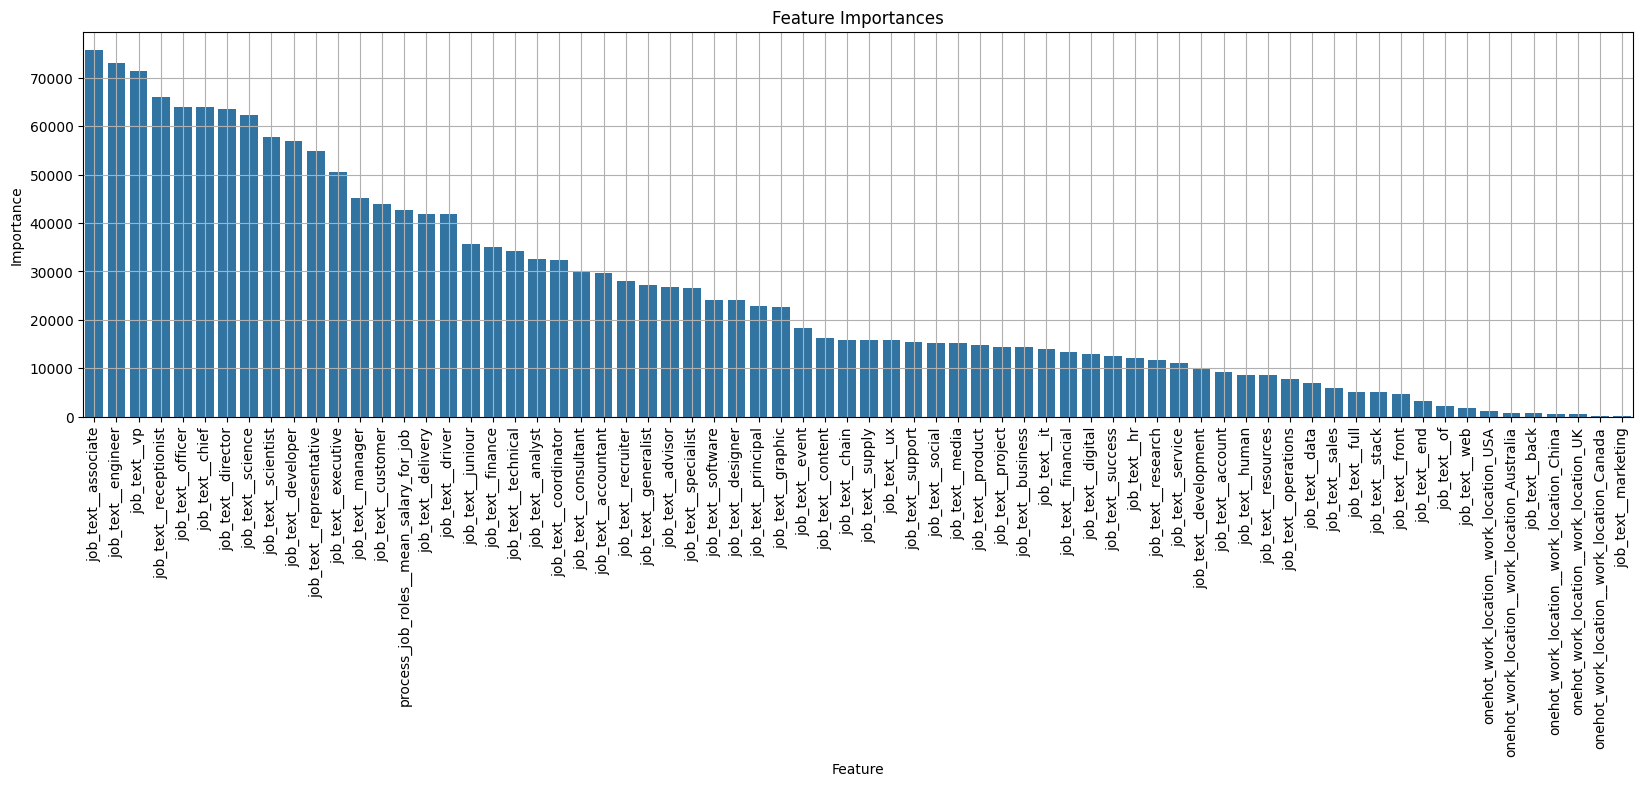

822.3777427237569
214.75505988610738
581.422898490654
-532.3811357160203
-1086.1745650675891
42611.21765227098
9181.955546235376
29568.234337760092
26734.50423471045
32617.56723511678
75761.31983173931
819.7545080020068
14296.400321521323
15848.497522935873
63954.116820319854
30096.252687793476
16294.621001156152
32377.016639988557
43959.51064638011
6980.041551952291
41790.22017486753
23995.736346827132
56881.72548310339
9977.711599116314
13009.811463496582
63645.91515511315
41790.22017486753
-3282.9604230099376
73104.0765875898
18351.920176621108
50551.50515076909
35142.96234896951
13356.730334045058
-4653.797826762537
5155.187261623265
27104.988303310096
22645.449535435142
12112.343314638476
8588.287743659883
13946.059679789954
35674.401436198685
45115.064684492114
-136.72838492141742
15234.654242023056
-2219.949603426687
63954.116820319854
7729.953871879153
22836.313799879616
14822.760053672966
14365.586256386667
65956.8023582294
27999.595004768704
54952.98537764896
11654.8785164858

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = model.named_steps["data_preprocessing"].get_feature_names_out()
feature_importances = model.named_steps["linear_reg"].coef_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(feature_importances)  # Using absolute values for importance
})

plt.figure (figsize=(20,5))
plt.title('Feature Importances')
sns.barplot(importance_df.sort_values(by='Importance', ascending=False), x='Feature', y='Importance', errorbar=None)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

print (*feature_importances, sep="\n")

In [14]:
from sklearn.model_selection import GridSearchCV

# Tune the model
param_grid = {
    'linear_reg__fit_intercept': [True, False]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)  # Convert back from negative MSE

# Get the best model
best_model = grid_search.best_estimator_

eval_model (best_model, X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'linear_reg__fit_intercept': False}
Best score: 1139698680.6112409
Cross validation:  [0.58954341 0.54604394 0.60617018 0.61593572 0.59501617]
Overall:  0.5905418848608118


In [15]:
eval_model (model, X_test, y_test)
eval_model (best_model, X_test, y_test)

Cross validation:  [0.50560217 0.56672354 0.63473131 0.57666352 0.55005377]
Overall:  0.5667548603515566
Cross validation:  [0.50559929 0.5667219  0.63473165 0.57666274 0.55005599]
Overall:  0.5667543142689763


In [16]:
y_pred = best_model.predict (X_train)

results = pd.DataFrame ()
results["y_pred"] = y_pred
results["y_train"] = y_train
results["abs_diff"] = (y_train - y_pred).abs ()

print (results.head ())

          y_pred   y_train      abs_diff
0  121619.047694   90000.0  30264.393110
1   30825.051378   65000.0  53269.927497
2  120264.393110  150000.0   9033.303796
3  120264.393110   60000.0  30476.011473
4  164771.304911  200000.0   5143.600718


In [17]:
import cloudpickle

with open('./trained_model.pkl', 'wb') as file:
    cloudpickle.dump(model, file)